In [11]:
%pylab inline
import glob 

Populating the interactive namespace from numpy and matplotlib


In [1]:
cd /project/projectdirs/astro250/doris/ramses/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses/trunk/ramses/bin


In [10]:
timestep = 1
# id, mass (msol), x, y ,z, vx,vy,vz
sink_info = np.loadtxt("output_00001/sink_00001.info",comments="=",skiprows=4)
print sink_info

[  1.00000000e+00   2.37497100e-06   7.00000000e+01   7.00000000e+01
   7.00000000e+01   1.00000000e-08   1.00000000e-08   1.00000000e-08]


In [9]:
sink_info[1]

2.374971e-06

In [17]:
msink=[]
for timestep in np.arange(1,15): 
    sink_info = np.loadtxt("output_{0}/sink_{0}.info".format(str(timestep).zfill(5)),comments="=",skiprows=4)
    msink.append(sink_info[1])

In [18]:
msink

[2.374971e-06,
 0.00028845079999999999,
 0.00057475690000000003,
 0.00085849570000000005,
 0.001144246,
 0.0014274369999999999,
 0.0017126400000000001,
 0.0019975710000000001,
 0.0022799560000000001,
 0.002564354,
 0.0028462159999999999,
 0.0031300899999999999,
 0.0034114380000000001,
 0.0036948010000000002]

In [50]:
rho_c = 1.1e-19
G = 6.67e-8
a  = 28730.5#in cm/s from sqrt(kT/m) where T = 10K
r_to_xi_factor = sqrt(4*pi*rho_c*G)/a
t_to_tau_factor = sqrt(4*pi*G*rho_c)
l_scale = 4.947e16 #code units --> cgs conversion 
t_scale = 1.95482e12
M_to_m_factor = G*sqrt(4*pi*G*rho_c)/a**3
M_sun =  1.9891e33 #grams
print r_to_xi_factor
print t_to_tau_factor
print M_to_m_factor

1.05686863016e-17
3.03643641787e-13
8.54005117358e-34


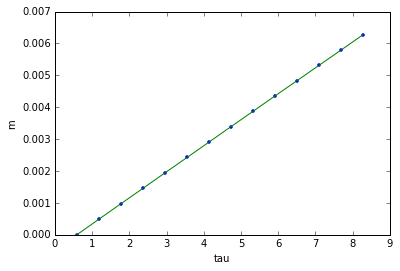

In [57]:
m = np.array(msink)*M_sun*M_to_m_factor
tstep  = np.arange(1,15)
tau = tstep*dt*t_to_tau_factor
plt.plot(tau,m,'.')
plt.plot(tau,m)
plt.xlabel("tau")
plt.ylabel("m")

In [30]:
# Using Euler's approximation : 
#     $$d ln y(r) = ln y(r + dr) − ln y(r)$$

In [63]:
dt =  1.948706918e+12 #seconds  #uniform timestep outputs [0.0618 Myrs]
dm = np.roll(m,1)-m
Mdot =  (dm/dt)[1:-1] #M_sun/second

In [66]:
Mdot

array([ -2.49374320e-16,  -2.49575049e-16,  -2.47337115e-16,
        -2.49090554e-16,  -2.46859594e-16,  -2.48613469e-16,
        -2.48376364e-16,  -2.46156998e-16,  -2.47911745e-16,
        -2.45701095e-16,  -2.47454970e-16,  -2.45253038e-16])

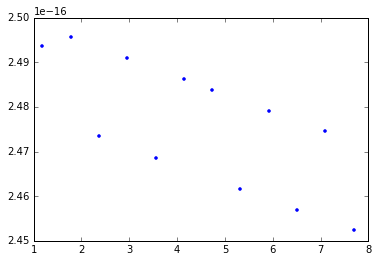

In [67]:
plt.plot(tau[1:-1],-Mdot,'.')

I think this is an artifact of rolling 